In [ ]:
pip install nltk

In [ ]:
pip install seaborn

In [ ]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/train.csv')

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
train.shape

(31962, 3)

In [ ]:
test.shape

(17197, 2)

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

(49159, 3)

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                            

## Removing twitter handles 


In [ ]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


## Removing short words (a,is,so etc..)

In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [ ]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

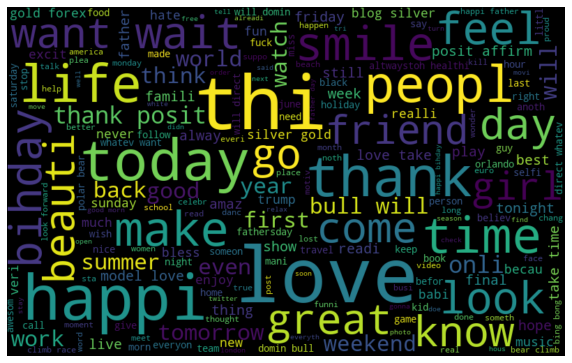

In [ ]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Separate cloud

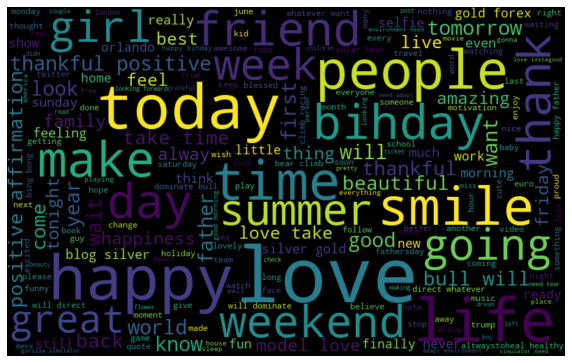

In [ ]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

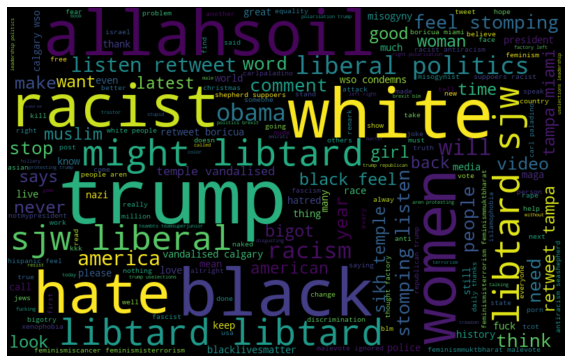

In [ ]:
negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## understanding impact of hashtags on tweet sentiment

In [ ]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])

ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])


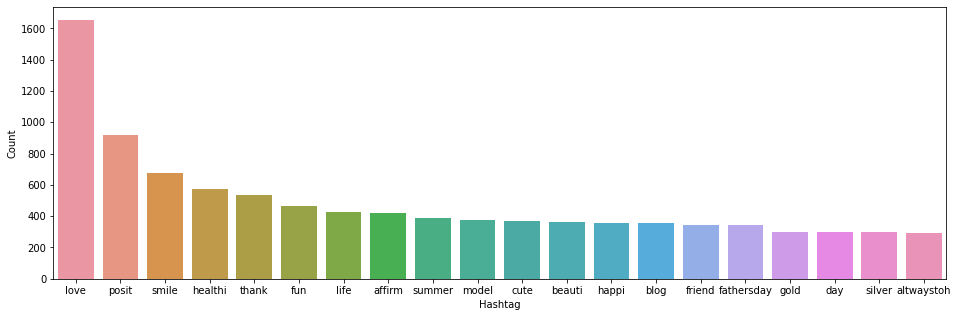

In [ ]:
nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

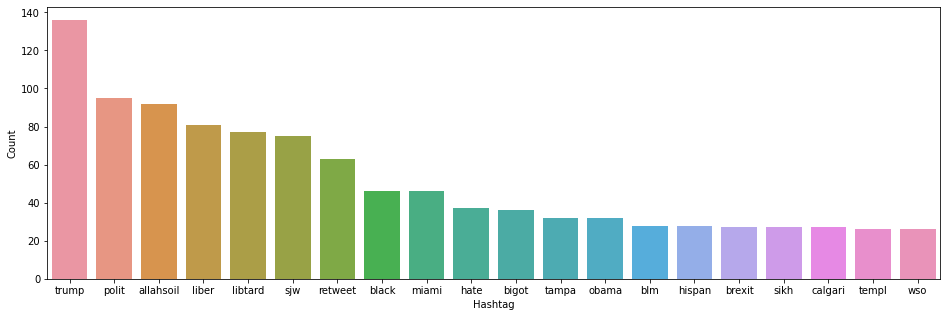

In [ ]:
racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())})

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

## Now we will apply assorted techniques like bag of words,TF-IDF for converting data into features

In [ ]:
pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])

In [ ]:
combine=combine.fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


## we will use Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

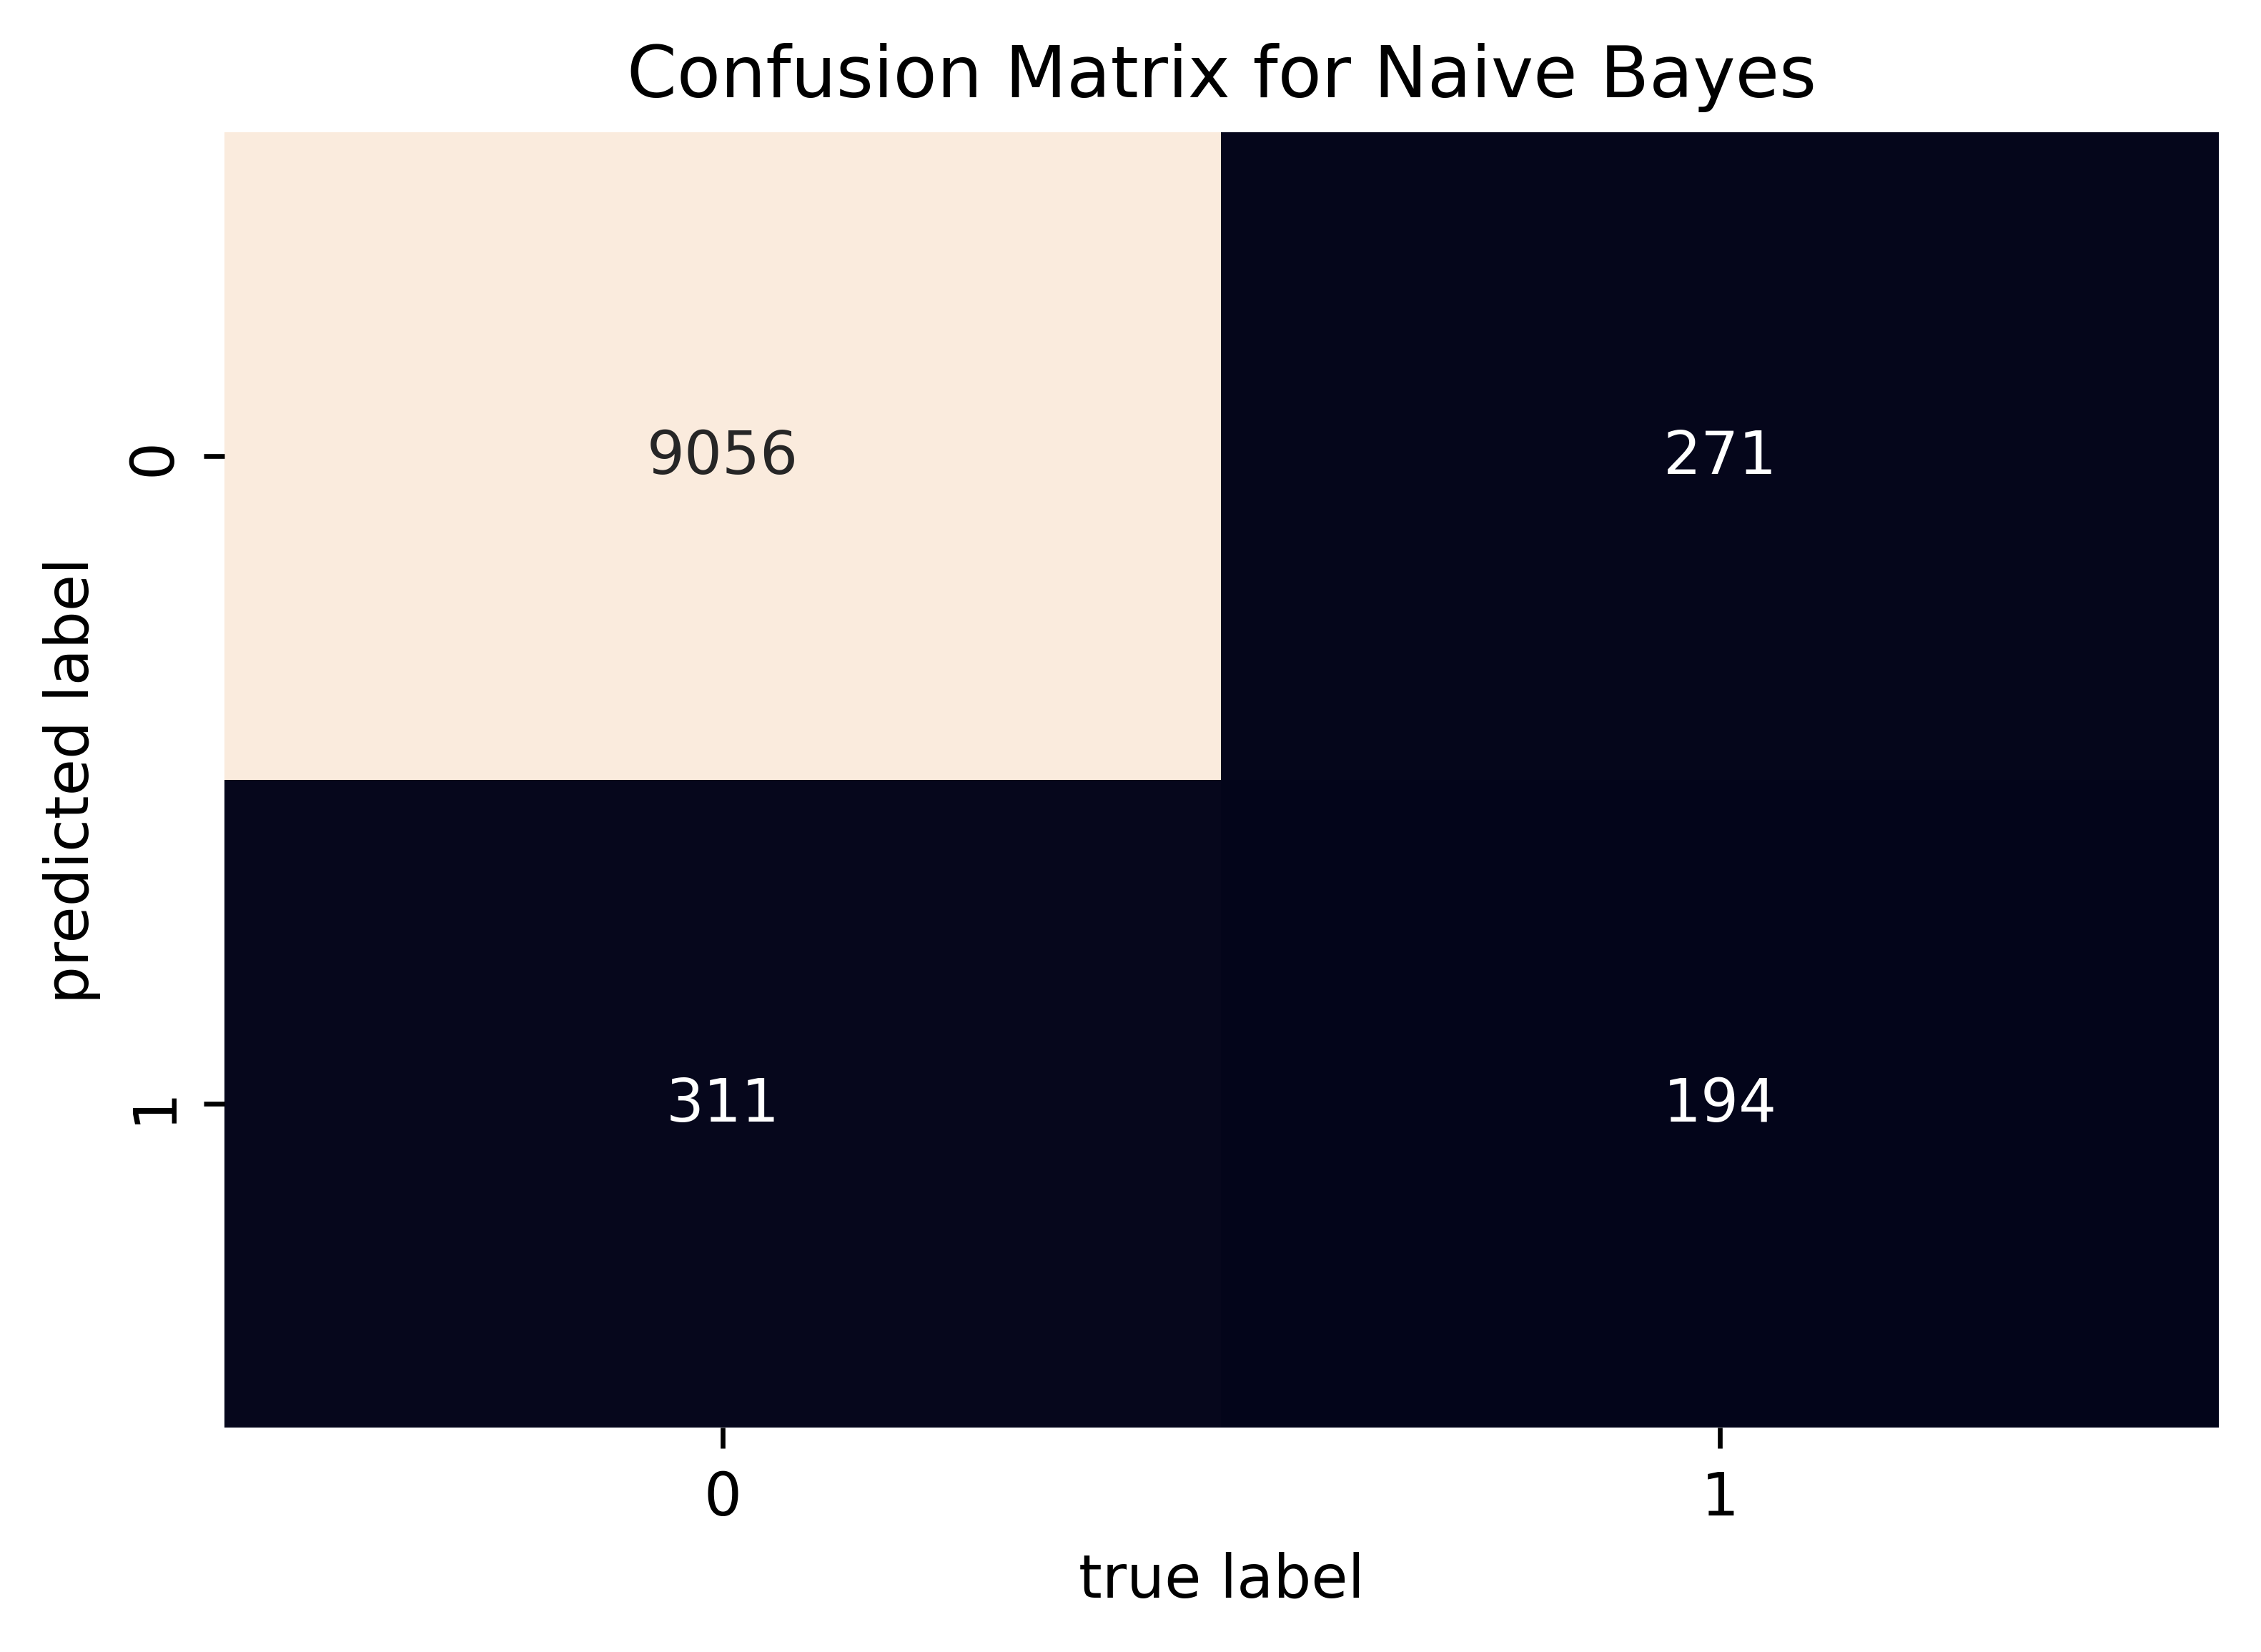

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9408055329536208


In [ ]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords

import numpy as np

nltk.download('twitter_samples')
nltk.download('stopwords')


all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string

from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def process_tweet(tweet):
  stemmer = PorterStemmer() 
  stopwords_english = stopwords.words('english')

  tweet = re.sub(r'\$\w*', '', tweet)

  tweet = re.sub(r'^RT[\s]+', '', tweet)
 
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  tweet = re.sub(r'#', '', tweet)

  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)
      tweet_clean.append(stem_word)

  return tweet_clean


In [ ]:
tweet = all_positive_tweets[np.random.randint(0, 5000)]
print('Raw Tweet : \n', tweet)
tweet = process_tweet(tweet)
print('After processing the tweet : \n', tweet)

Raw Tweet : 
 @WforWoman 5. Over 20 W kurtas! And my Mom has about half the number I have :D #WSaleLove
After processing the tweet : 
 ['5', '20', 'w', 'kurta', 'mom', 'half', 'number', ':D', 'wsalelov']


In [ ]:
def count_tweets(tweets, ys):
  ys_list = np.squeeze(ys).tolist()
  freqs ={}

  for y, tweet in zip(ys_list, tweets):
    for word in process_tweet(tweet):
      pair = (word, y)
      if pair in freqs:
        freqs[pair] +=1
      else:
        freqs[pair] = 1
  
  return freqs

def lookup(freqs, word, label):
  n = 0
  pair = (word, label)
  if pair in freqs:
    n = freqs[pair]
  return n 

train_pos = all_positive_tweets[:4000]
test_pos = all_positive_tweets[4000:]

train_neg = all_negative_tweets[:4000]
test_neg = all_negative_tweets[4000:]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos))), np.zeros((len(train_neg))))
test_y = np.append(np.ones((len(test_neg))), np.zeros((len(test_neg))))

In [ ]:
freqs = count_tweets(train_x, train_y)

def train_naive_bayes(freqs, train_x, train_y):
  logliklihood = {}
  logprior = 0

  vocab = set([pair[0] for pair in freqs.keys()])
  V = len(vocab)

  N_pos = N_neg = V_pos = V_neg = 0
  for pair in freqs.keys():
    if pair[1]>0:
      V_pos +=1
      N_pos += freqs[pair]
    else:
      V_neg +=1
      N_neg += freqs[pair]

  D = len(train_y)

  D_pos = len(list(filter(lambda x: x>0, train_y)))

  D_neg = len(list(filter(lambda x: x<=0, train_y)))

  logprior = np.log(D_pos) - np.log(D_neg)

  for word in vocab:
    freqs_pos = lookup(freqs, word, 1)
    freqs_neg = lookup(freqs, word, 0)

    p_w_pos = (freqs_pos+1)/(N_pos+V)
    p_w_neg = (freqs_neg+1)/(N_neg+V)

    logliklihood[word] = np.log(p_w_pos/p_w_neg)
  
  return logprior, logliklihood

logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

def naive_bayes_predict(tweet, logprior, loglikelihood):
  word_l = process_tweet(tweet)
  p = 0
  p+=logprior

  for word in word_l:
    if word in loglikelihood:
      p+=loglikelihood[word]

  return p

0.0
9089


In [ ]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
  accuracy = 0
  y_hats = []
  for tweet in test_x:
    if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
      y_hat_i = 1
    else:
      y_hat_i = 0
    y_hats.append(y_hat_i)
  error = np.mean(np.absolute(test_y - y_hats))
  accuracy = 1-error
  return accuracy
  
  print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

In [ ]:
tweets = ['today iam going to college','He is Happy', 'This is bad', 'This game ought to be nice', 'Deeply saddened by the untimely demise of CDS Bipin Rawat ji and other officials in a tragic helicopter crash']

for tweet in tweets:
  p = naive_bayes_predict(tweet, logprior, loglikelihood)

  if p>0:
    print('')
    print(f'{tweet} :: Positive sentiment ')
  else:
    print('')
    print(f'{tweet} :: Negative sentiment ')


He is Happy :: Positive sentiment 

This is bad :: Negative sentiment 

This game ought to be nice :: Positive sentiment 

Deeply saddened by the untimely demise of CDS Bipin Rawat ji and other officials in a tragic helicopter crash :: Negative sentiment 
